In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('./data/data.csv')
df.head()

,id,branch,found,course,daynight,major,school,school_area,sex,age,...,q001,q002,q003,q004,q006,p001,p026,p029,p036,p045
0,5.0,1.0,3.0,3.0,0,1.0,1.0,1,1,26.333333,...,3.0,2.0,8.0,0,1.0,1.0,5.0,5.0,6.00,0
1,167.0,1.0,3.0,5.0,1,1.0,1.0,1,1,24.333333,...,2.0,3.0,5.0,1,3.0,1.0,5.0,5.0,2.00,0
2,187.0,1.0,3.0,3.0,0,1.0,1.0,0,1,28.500000,...,5.0,10.0,7.0,0,3.0,1.0,5.0,6.0,3.01,0
3,237.0,1.0,3.0,3.0,1,1.0,1.0,1,1,23.500000,...,4.0,2.0,7.0,0,3.0,1.0,3.0,4.0,3.00,0
4,260.0,1.0,3.0,5.0,1,1.0,1.0,0,1,24.750000,...,1.0,5.0,6.0,0,1.0,1.0,3.0,3.0,2.00,0


In [14]:
df.columns

Index(['id', 'branch', 'found', 'course', 'daynight', 'major', 'school',
       'school_area', 'sex', 'age', 'hire_state', 'b022', 'b023', 'b036',
       'b038', 'b039', 'b040', 'f009', 'i001', 'i033', 'i037', 'i042', 'i046',
       'i066', 'i076', 'l001', 'l009', 'l016', 'm002', 'k110', 'k004', 'k007',
       'k009', 'k011', 'q001', 'q002', 'q003', 'q004', 'q006', 'p001', 'p026',
       'p029', 'p036', 'p045'],
      dtype='object')

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(df.drop(['hire_state'],axis=1), df['hire_state'], random_state=0)

In [16]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(0.7688227241615332, 0.7785476007185014)

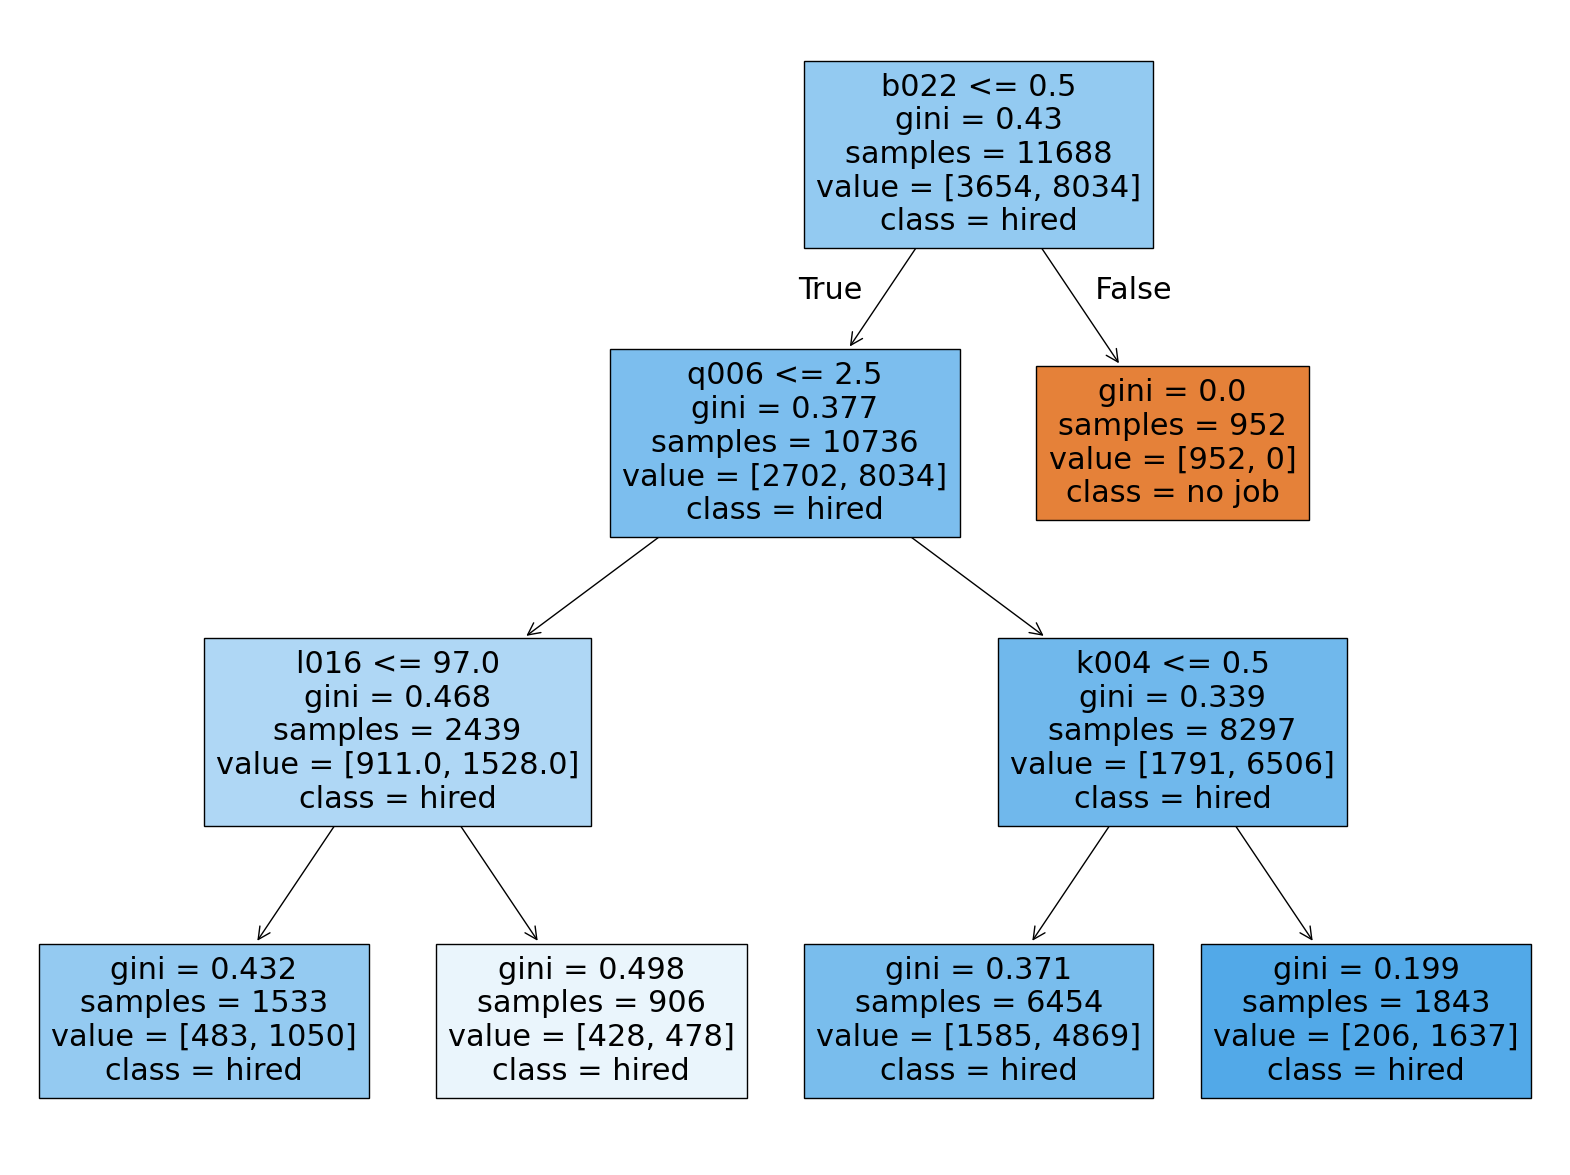

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
# plot_tree(dt_clf)
plot_tree(dt_clf, filled=True,   # 색 채우기 옵션 (특정 클래스의 비율 표현)
          feature_names=list(X_train.columns),    # 특성 이름 
          class_names=['no job','hired'],  # 클래스 이름
          max_depth=5 # 그림에 대하여 최대 깊이 지정
)
plt.show()

In [18]:
aa = df[['hire_state','b040']]
aa.groupby('hire_state').value_counts()

hire_state  b040
0           0        3981
            1         872
1           0       10732
Name: count, dtype: int64

In [19]:
# b로 시작하는 변수 삭제
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier()

X = df.drop(['id','hire_state','b022', 'b023', 'b036', 'b038', 'b039', 'b040'],axis=1)
y = df['hire_state']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(0.7015742642026009, 0.6918142160636387)

In [21]:
from sklearn.metrics import confusion_matrix
y_pred = dt_clf.predict(X_test)
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[ 274,  925],
       [ 276, 2422]])

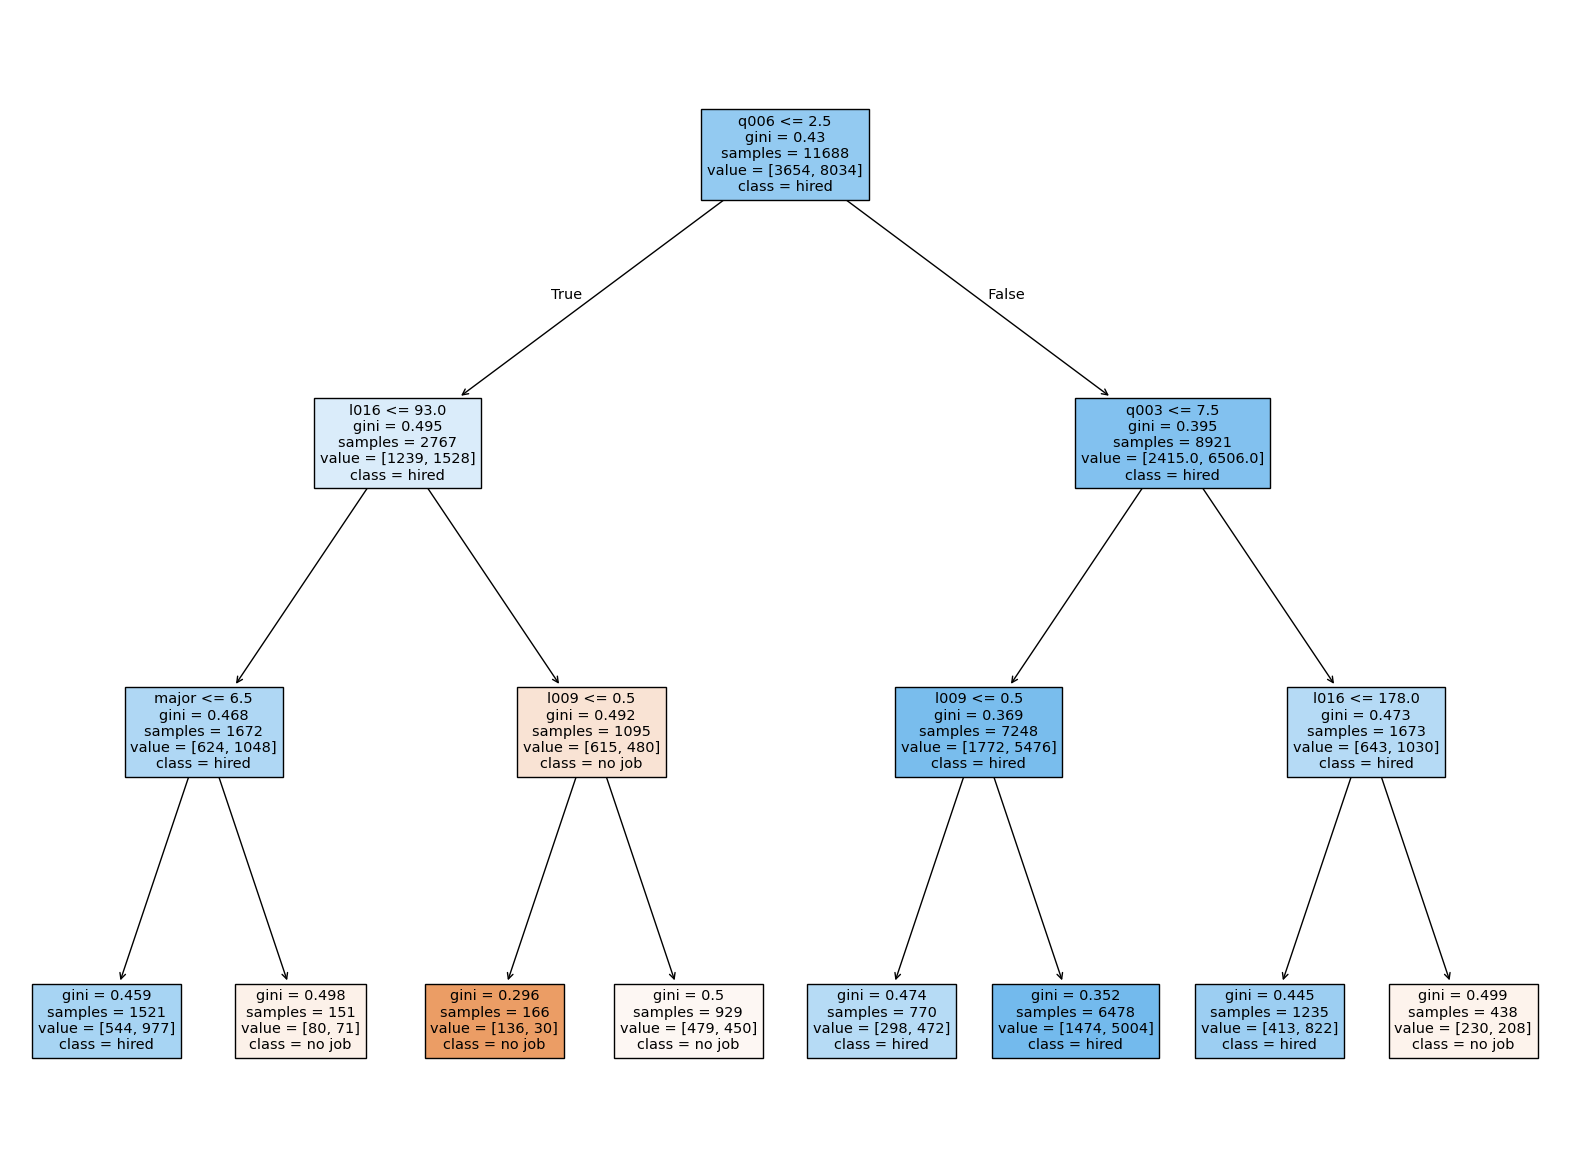

In [22]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
# plot_tree(dt_clf)
plot_tree(dt_clf, filled=True,   # 색 채우기 옵션 (특정 클래스의 비율 표현)
          feature_names=list(X_train.columns),    # 특성 이름 
          class_names=['no job','hired'],  # 클래스 이름
          max_depth=5 # 그림에 대하여 최대 깊이 지정
)
plt.show()
# q006: 음주빈도2.5이하 취직, l016: 훈련시간 93시간 이하 취직, q003: 하루 평균 수면시간7.5이하 취직

In [23]:
# cv stratified 머시기로 해보기
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
skf = StratifiedKFold(n_splits=5)
params = {
    "max_depth": [1,2,3,4,5,6,7]
}
gscv_tree = GridSearchCV (dt_clf, params, scoring ='accuracy', cv = skf)
gscv_tree.fit(X_train, y_train)
print(gscv_tree.best_estimator_)
pd.DataFrame(gscv_tree.cv_results_)

DecisionTreeClassifier(max_depth=4, random_state=0)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008116,0.000911,0.001926,0.000447,1,{'max_depth': 1},0.687340,0.687340,0.687340,0.687634,0.687206,0.687372,0.000141,7
1,0.010683,0.000386,0.001060,0.000090,2,{'max_depth': 2},0.695038,0.712575,0.698033,0.692769,0.694480,0.698579,0.007201,6
2,0.014395,0.000444,0.001243,0.000402,3,{'max_depth': 3},0.693328,0.713003,0.702310,0.691485,0.696192,0.699263,0.007787,5
3,0.019827,0.002395,0.001625,0.000477,4,{'max_depth': 4},0.710009,0.724123,0.705731,0.706461,0.702182,0.709701,0.007627,1
4,0.022392,0.000678,0.001842,0.000424,5,{'max_depth': 5},0.711292,0.725834,0.703165,0.705605,0.691057,0.707391,0.011342,3
5,0.026849,0.000711,0.001464,0.000522,6,{'max_depth': 6},0.707870,0.724123,0.704021,0.702182,0.700043,0.707648,0.008630,2
6,0.030520,0.000848,0.001248,0.000464,7,{'max_depth': 7},0.698460,0.720274,0.701027,0.697903,0.694480,0.702429,0.009163,4


In [25]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_features='sqrt',  # 특성의 일부만 사용
    random_state=42
)
rf_clf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf_clf.score(X_test, y_test))

Random Forest Accuracy: 0.7205542725173211


In [14]:
# !pip install xgboost

In [26]:
# xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=0
)

xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

0.7418720054757015
0.724659994867847
              precision    recall  f1-score   support

           0       0.73      0.28      0.40      3654
           1       0.74      0.95      0.84      8034

    accuracy                           0.74     11688
   macro avg       0.74      0.62      0.62     11688
weighted avg       0.74      0.74      0.70     11688

              precision    recall  f1-score   support

           0       0.63      0.25      0.36      1199
           1       0.74      0.94      0.82      2698

    accuracy                           0.72      3897
   macro avg       0.69      0.59      0.59      3897
weighted avg       0.71      0.72      0.68      3897



In [16]:
# !pip install imblearn

### oversampleing

In [56]:
from imblearn.over_sampling import SMOTE
from collections import Counter   
from imblearn.over_sampling import RandomOverSampler

counter = Counter(y)
print(counter)

smt = SMOTE(random_state=42)
X_new, y_new = smt.fit_resample(X, y)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

counter = Counter(y_new)
print(counter)
counter = Counter(y_res)
print(counter)

Counter({1: 10732, 0: 4853})
Counter({0: 10732, 1: 10732})
Counter({0: 10732, 1: 10732})


0.6087712759348988 0.5972791651136787


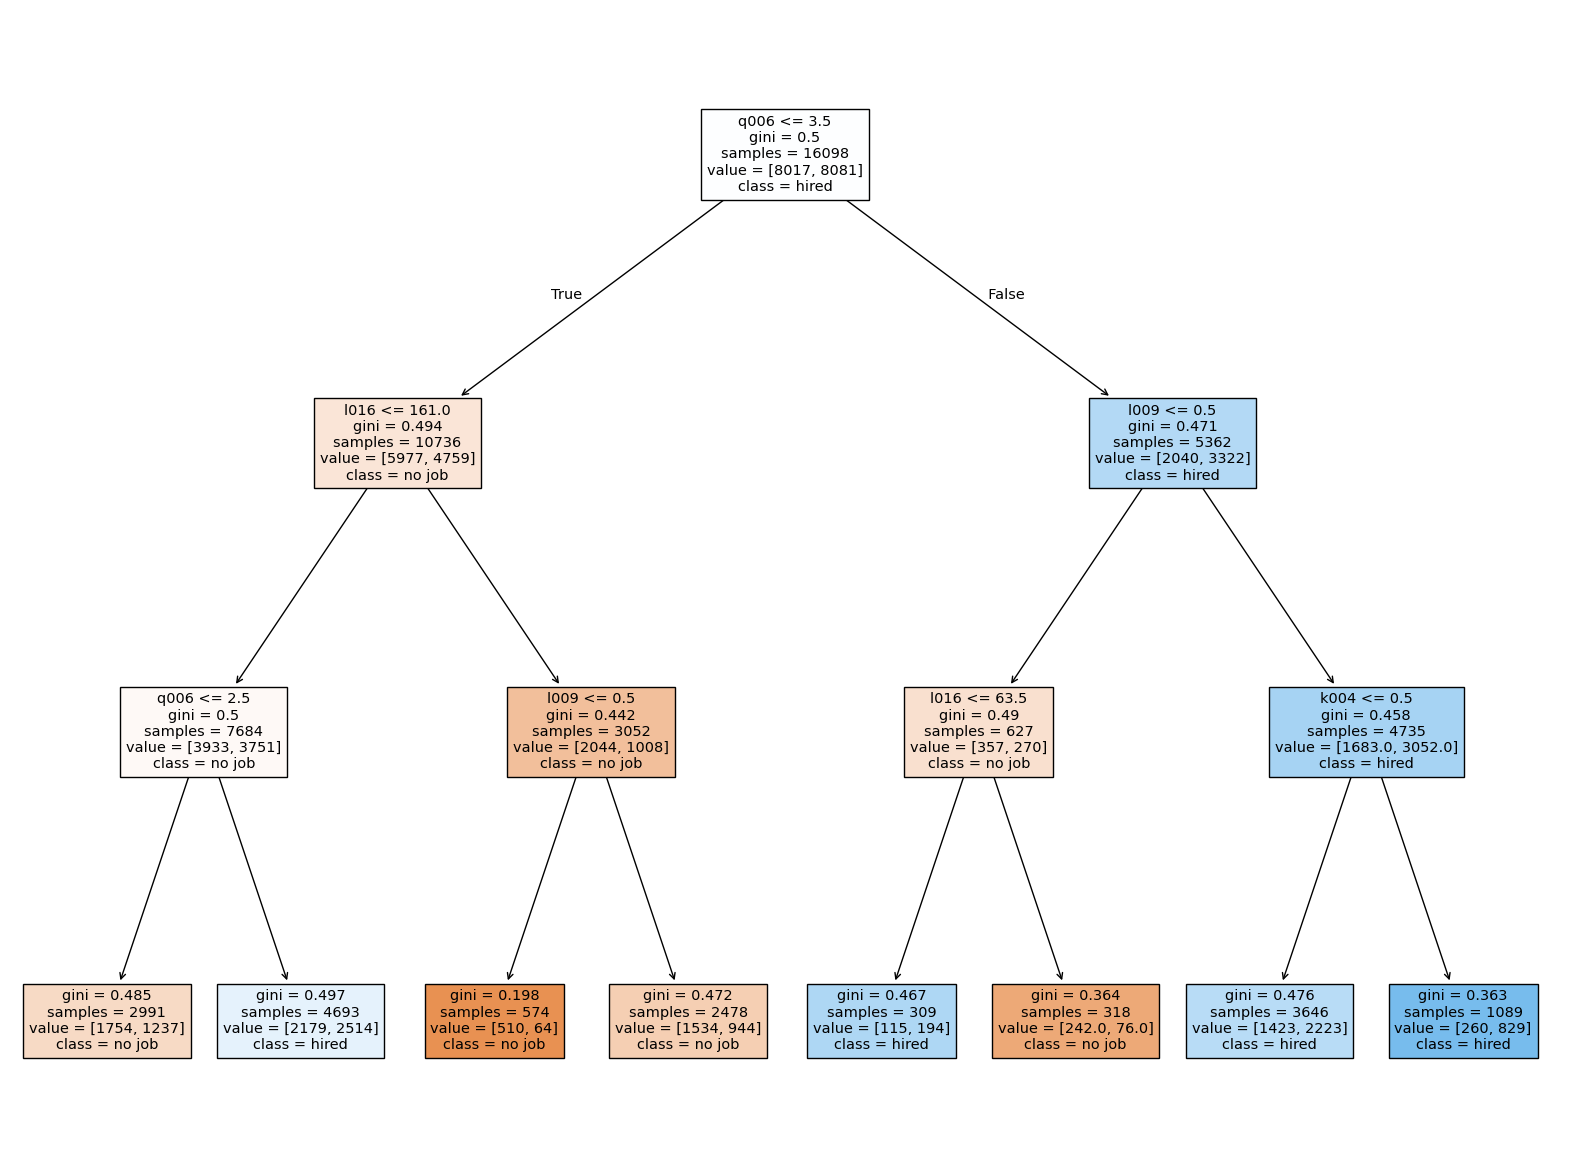

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=0)

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

print(dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test))

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
# plot_tree(dt_clf)
plot_tree(dt_clf, filled=True,   # 색 채우기 옵션 (특정 클래스의 비율 표현)
          feature_names=list(X_train.columns),    # 특성 이름 
          class_names=['no job','hired'],  # 클래스 이름
          max_depth=5 # 그림에 대하여 최대 깊이 지정
)
plt.show()

# q006: 음주빈도 4. 일주일 1~2회 이하 취직, 
# q006: 음주빈도 3. 한달 1~2회 이하 무직,
# l016: 훈련시간 50.5시간 이하 무직, 
# l009: 직업훈련 수료여부 수료 안함 취직

In [58]:
y_pred = dt_clf.predict(X_test)
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[1348, 1367],
       [ 794, 1857]])

그리드서치

In [61]:
skf = StratifiedKFold(n_splits=5)
dt_clf = DecisionTreeClassifier(random_state=0)
params = {
    "max_depth": [12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
}
gscv_tree = GridSearchCV (dt_clf, params, scoring ='accuracy', cv = skf)
gscv_tree.fit(X_train, y_train)
print(gscv_tree.best_estimator_)
pd.DataFrame(gscv_tree.cv_results_)

DecisionTreeClassifier(max_depth=23, random_state=0)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101107,0.003149,0.003455,0.004235,12,{'max_depth': 12},0.670807,0.659006,0.674845,0.665424,0.671326,0.668282,0.005530,15
1,0.099421,0.004886,0.001477,0.002480,13,{'max_depth': 13},0.674534,0.675776,0.684783,0.668531,0.684685,0.677662,0.006273,14
2,0.129684,0.018793,0.004845,0.003957,14,{'max_depth': 14},0.692236,0.695652,0.697516,0.682510,0.696800,0.692943,0.005522,13
3,0.110723,0.006312,0.006767,0.003386,15,{'max_depth': 15},0.694410,0.691925,0.713043,0.697111,0.694626,0.698223,0.007590,12
4,0.132170,0.010945,0.001740,0.003480,16,{'max_depth': 16},0.712112,0.707143,0.708075,0.703635,0.709848,0.708162,0.002828,11
5,0.122839,0.005491,0.006425,0.003698,17,{'max_depth': 17},0.718944,0.712422,0.720497,0.703945,0.717925,0.714747,0.006047,10
6,0.126885,0.004578,0.000000,0.000000,18,{'max_depth': 18},0.721118,0.729814,0.741304,0.724759,0.726934,0.728786,0.006873,9
7,0.134188,0.013509,0.005041,0.004117,19,{'max_depth': 19},0.722671,0.739441,0.735714,0.728487,0.737185,0.732700,0.006213,8
8,0.130347,0.008199,0.005162,0.004220,20,{'max_depth': 20},0.727950,0.742857,0.739752,0.726313,0.739671,0.735308,0.006794,7
9,0.126919,0.007186,0.006635,0.003326,21,{'max_depth': 21},0.735714,0.746894,0.741304,0.730040,0.740913,0.738973,0.005698,6


In [ ]:
# 랜덤 포레스트
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_features='sqrt',  # 특성의 일부만 사용
    random_state=42
)
# rf_clf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf_clf.score(X_test, y_test))

Random Forest Accuracy: 0.857994781960492


In [70]:
skf = StratifiedKFold(n_splits=5)
rf_clf = RandomForestClassifier(random_state=0)
params = {
    "max_depth": [26,27,28,29],
    "n_estimators": [1000]
}
gscv_rf = GridSearchCV (rf_clf, params, scoring ='accuracy', cv = skf)
gscv_rf.fit(X_train, y_train)
print(gscv_rf.best_estimator_)

RandomForestClassifier(max_depth=26, n_estimators=1000, random_state=0)


In [69]:
pd.DataFrame(gscv_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.265449,0.087904,0.444620,0.006424,26,1000,"{'max_depth': 26, 'n_estimators': 1000}",0.827640,0.821429,0.817391,0.819199,0.814849,0.820101,0.004344,1
1,13.566231,0.160256,0.465245,0.015964,30,1000,"{'max_depth': 30, 'n_estimators': 1000}",0.823602,0.814907,0.820186,0.822616,0.814228,0.819108,0.003876,4
2,13.380850,0.170813,0.453415,0.020791,35,1000,"{'max_depth': 35, 'n_estimators': 1000}",0.828882,0.812422,0.819565,0.820441,0.813917,0.819046,0.005816,5
3,13.331900,0.067883,0.453011,0.012690,40,1000,"{'max_depth': 40, 'n_estimators': 1000}",0.829503,0.813665,0.820807,0.821373,0.812053,0.819480,0.006241,2
4,13.395238,0.100902,0.456452,0.006592,45,1000,"{'max_depth': 45, 'n_estimators': 1000}",0.828571,0.813975,0.822050,0.820441,0.812053,0.819418,0.005927,3


In [65]:
# xgboost
xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=0
)

xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
# print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))
confusion_matrix(y_test, y_pred_test, labels=[0, 1])

0.6776618213442663
0.660268356317555
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      2715
           1       0.65      0.69      0.67      2651

    accuracy                           0.66      5366
   macro avg       0.66      0.66      0.66      5366
weighted avg       0.66      0.66      0.66      5366



array([[1705, 1010],
       [ 813, 1838]])

In [ ]:
# XGBClassifier가 내부적으로 scikit-learn의 BaseEstimator를 상속받으면서 발생하는 오류일 수 있습니다.
# 이럴 경우, XGBClassifier를 XGBModel로 변경해보세요.
from xgboost import XGBModel
skf = StratifiedKFold(n_splits=5)
xgb_clf = XGBClassifier(random_state=0)
params = {
    "max_depth": [3,5,7,10,15,20,25],
    "n_estimators": [100, 300, 500],
    'learning_rate' : [0.01,0.05,0.1]
}
gscv_xg = GridSearchCV (xgb_clf, params, scoring ='accuracy', cv = skf)
gscv_xg.fit(X_train, y_train)
print(gscv_xg.best_estimator_)

In [78]:
params = {
    "max_depth": [15,20,25,30,35],
    "n_estimators": [500, 1000],
    'learning_rate' : [0.01,0.05,0.1]
}
for i in params['max_depth']:
    for j in params['n_estimators']:
        for k in params['learning_rate']:
            xgb_clf = XGBClassifier(random_state=0,max_depth=i, n_estimators=j, learning_rate=k)
            xgb_clf.fit(X_train, y_train)
            print(i,j,k,accuracy_score(y_test, xgb_clf.predict(X_test)))
# print(gscv_xg.best_estimator_)

15 500 0.01 0.8324636600819978
15 500 0.05 0.8415952292210213
15 500 0.1 0.8428997390980246
15 1000 0.01 0.8399180022363026
15 1000 0.05 0.8417815877748789
15 1000 0.1 0.8414088706671636
20 500 0.01 0.8378680581438688
20 500 0.05 0.8464405516213194
20 500 0.1 0.8449496831904585
20 1000 0.01 0.8419679463287365
20 1000 0.05 0.8468132687290346
20 1000 0.1 0.8414088706671636
25 500 0.01 0.8404770778978755
25 500 0.05 0.8492359299291837
25 500 0.1 0.8428997390980246
25 1000 0.01 0.845695117405889
25 1000 0.05 0.8451360417443161
25 1000 0.1 0.8406634364517331
30 500 0.01 0.8384271338054416
30 500 0.05 0.8455087588520314
30 500 0.1 0.8434588147595975
30 1000 0.01 0.8445769660827432
30 1000 0.05 0.8451360417443161
30 1000 0.1 0.8417815877748789
35 500 0.01 0.8395452851285874
35 500 0.05 0.8473723443906075
35 500 0.1 0.8451360417443161
35 1000 0.01 0.8415952292210213
35 1000 0.05 0.8453224002981737
35 1000 0.1 0.8449496831904585


In [73]:
print(gscv_xg.best_estimator_)

XGBModel(learning_rate=0.01, max_depth=3, n_estimators=100, random_state=0)


In [72]:
pd.DataFrame(gscv_xg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.074233,0.009721,0.011479,0.002438,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.137662,0.004489,0.010842,0.001999,0.01,3,300,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.233649,0.010562,0.014976,0.002585,0.01,3,500,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0.086283,0.003838,0.012588,0.002424,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,0.221579,0.008385,0.013497,0.002299,0.01,5,300,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,3.709574,0.158585,0.019173,0.000943,0.10,20,300,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
59,3.778266,0.099547,0.020911,0.002469,0.10,20,500,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
60,3.794349,0.078518,0.020095,0.001505,0.10,25,100,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
61,3.955923,0.142120,0.022221,0.003387,0.10,25,300,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [81]:
# LightGBM
from lightgbm import LGBMClassifier
skf = StratifiedKFold(n_splits=5)
lgbm_clf = LGBMClassifier(random_state=0, early_stopping_rounds=100)
params = {
    "n_estimators": [1000,1500,2000],
    'learning_rate' : [0.1,0.15,0.2,0.5]
}
gscv_lgbm = GridSearchCV (lgbm_clf, params, scoring ='accuracy', cv = skf)
gscv_lgbm.fit(X_train, y_train, eval_set=(X_test, y_test))
print(gscv_lgbm.best_estimator_)
pd.DataFrame(gscv_lgbm.cv_results_)

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 6465, number of negative: 6413
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1096
[LightGBM] [Info] Number of data points in the train set: 12878, number of used features: 36
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502019 -> initscore=0.008076
[LightGBM] [Info] Start training from score 0.008076
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[992]	valid_0's binary_logloss: 0.463443
[LightGBM] [Warning] 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.653668,0.024202,0.020867,0.000437,0.10,1000,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.786646,0.792547,0.795963,0.793103,0.794346,0.792521,0.003163,9
1,0.801833,0.051003,0.024281,0.001775,0.10,1500,"{'learning_rate': 0.1, 'n_estimators': 1500}",0.794099,0.791925,0.796584,0.797142,0.797453,0.795441,0.002117,1
2,0.851744,0.047383,0.025977,0.001906,0.10,2000,"{'learning_rate': 0.1, 'n_estimators': 2000}",0.794099,0.791925,0.796584,0.797142,0.797453,0.795441,0.002117,1
3,0.630663,0.036178,0.017698,0.000625,0.15,1000,"{'learning_rate': 0.15, 'n_estimators': 1000}",0.798137,0.793478,0.802484,0.790929,0.790308,0.795067,0.004620,3
4,0.631026,0.033122,0.017484,0.001361,0.15,1500,"{'learning_rate': 0.15, 'n_estimators': 1500}",0.798137,0.793478,0.802484,0.790929,0.790308,0.795067,0.004620,3
5,0.640928,0.039546,0.017817,0.001322,0.15,2000,"{'learning_rate': 0.15, 'n_estimators': 2000}",0.798137,0.793478,0.802484,0.790929,0.790308,0.795067,0.004620,3
6,0.537630,0.040474,0.015105,0.001175,0.20,1000,"{'learning_rate': 0.2, 'n_estimators': 1000}",0.789130,0.798137,0.795342,0.788444,0.797453,0.793701,0.004122,6
7,0.536992,0.051169,0.014432,0.000865,0.20,1500,"{'learning_rate': 0.2, 'n_estimators': 1500}",0.789130,0.798137,0.795342,0.788444,0.797453,0.793701,0.004122,6
8,0.612807,0.072409,0.016483,0.002399,0.20,2000,"{'learning_rate': 0.2, 'n_estimators': 2000}",0.789130,0.798137,0.795342,0.788444,0.797453,0.793701,0.004122,6
9,0.282144,0.017277,0.008556,0.000559,0.50,1000,"{'learning_rate': 0.5, 'n_estimators': 1000}",0.799068,0.763975,0.782919,0.768251,0.777260,0.778295,0.012328,10


In [83]:
print(gscv_lgbm.best_estimator_)

LGBMClassifier(early_stopping_rounds=100, n_estimators=1500, random_state=0)


In [84]:
from sklearn.metrics import precision_score, recall_score
# 최종 모델 비교
dt_clf = DecisionTreeClassifier(max_depth=23, random_state=0)
rf_clf = RandomForestClassifier(max_depth=26, n_estimators=1000, random_state=0)
xgb_clf = XGBClassifier(learning_rate=0.01, max_depth=30, n_estimators=500, random_state=0)
lgbm_clf = LGBMClassifier(n_estimators=1500, learning_rate=0.1, random_state=0)

stratified_kfold = StratifiedKFold(n_splits=5)

# k번 반복하면서 평가한 정확도를 저장할 배열
dt_accuracy = []
dt_precision = []
dt_recall = []
rf_accuracy = []
rf_precision = []
rf_recall = []
xgb_accuracy = []
xgb_precision = []
xgb_recall = []
lgbm_accuracy = []
lgbm_precision = []
lgbm_recall = []

for train_index, val_index in stratified_kfold.split(X_new, y_new):
    X_train, y_train = X_new.iloc[train_index], y_new.iloc[train_index]
    X_val, y_val = X_new.iloc[val_index], y_new.iloc[val_index]

    dt_clf.fit(X_train, y_train)
    rf_clf.fit(X_train, y_train)
    xgb_clf.fit(X_train, y_train)
    lgbm_clf.fit(X_train, y_train)

    y_pred_dt = dt_clf.predict(X_val)   # 검증 데이터로 예측
    y_pred_rf = rf_clf.predict(X_val)   # 검증 데이터로 예측
    y_pred_xgb = xgb_clf.predict(X_val)   # 검증 데이터로 예측
    y_pred_lgbm = lgbm_clf.predict(X_val)   # 검증 데이터로 예측

    dt_accuracy.append(accuracy_score(y_val, y_pred_dt)) 
    rf_accuracy.append(accuracy_score(y_val, y_pred_rf)) 
    xgb_accuracy.append(accuracy_score(y_val, y_pred_xgb)) 
    lgbm_accuracy.append(accuracy_score(y_val, y_pred_lgbm)) 
    
    dt_precision.append(precision_score(y_val, y_pred_dt)) 
    rf_precision.append(precision_score(y_val, y_pred_rf)) 
    xgb_precision.append(precision_score(y_val, y_pred_xgb)) 
    lgbm_precision.append(precision_score(y_val, y_pred_lgbm)) 
    
    dt_recall.append(recall_score(y_val, y_pred_dt)) 
    rf_recall.append(recall_score(y_val, y_pred_rf)) 
    xgb_recall.append(recall_score(y_val, y_pred_xgb)) 
    lgbm_recall.append(recall_score(y_val, y_pred_lgbm)) 


print("의사결정나무 정확도:", np.mean(dt_accuracy))
print("의사결정나무 정밀도:", np.mean(dt_precision))
print("의사결정나무 재현율:", np.mean(dt_recall))

print("랜덤포레스트 정확도:", np.mean(rf_accuracy))
print("랜덤포레스트 정밀도:", np.mean(rf_precision))
print("랜덤포레스트 재현율:", np.mean(rf_recall))

print("xgboost 정확도:", np.mean(xgb_accuracy))
print("xgboost 정밀도:", np.mean(xgb_precision))
print("xgboost 재현율:", np.mean(xgb_recall))

print("lightGBM 정확도:", np.mean(lgbm_accuracy))
print("lightGBM 정밀도:", np.mean(lgbm_precision))
print("lightGBM 재현율:", np.mean(lgbm_recall))

[LightGBM] [Info] Number of positive: 8586, number of negative: 8585
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5025
[LightGBM] [Info] Number of data points in the train set: 17171, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500029 -> initscore=0.000116
[LightGBM] [Info] Start training from score 0.000116
[LightGBM] [Info] Number of positive: 8586, number of negative: 8585
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5024
[LightGBM] [Info] Number of data points in the train set: 17171, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500029 -> initscore=0.000116
[LightGBM] [Info] Start training from score 0.000116
[LightGBM] [Info] Nu

----------------------
추가적인 모델 사용

In [55]:
# 로지스틱
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

print(lr_clf.score(X_train_scaled, y_train), lr_clf.score(X_test_scaled, y_test))

0.7125108709156417 0.6964219157659337


In [56]:
# SVM
from sklearn.svm import SVC

model = SVC(kernel="rbf")   # kernel 기본값 "rbf"
model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.5280780221145484, 0.5370853522176668)

In [ ]:
# MLP
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(100,100,100,100,100),
    activation='relu',
    solver='adam',
    max_iter=5000,
    random_state=42
)
mlp.fit(X_train, y_train)

pred = mlp.predict(X_test)
print(accuracy_score(y_test, pred))
confusion_matrix(y_test, pred, labels=[0, 1])

0.5074543421543048


array([[2702,   13],
       [2630,   21]])